The geometric law of reflection famously used in pool is compared in these functions with option price projection modeling.

In [5]:
import math

# Function to calculate the reflection angle based on the geometric law of reflection
def calculate_reflection_angle(incident_angle):
    # Convert incident angle from degrees to radians
    incident_angle_rad = math.radians(incident_angle)
    
    # Calculate the reflection angle using the geometric law of reflection
    reflection_angle_rad = math.pi - incident_angle_rad
    
    # Convert the reflection angle back to degrees
    reflection_angle = math.degrees(reflection_angle_rad)
    
    return reflection_angle

# Function to project the option price using a mathematical model
def project_option_price(current_price, strike_price, volatility, time_to_expiry, risk_free_rate, option_type):
    if option_type == 'call':
        option_type_value = 1
    elif option_type == 'put':
        option_type_value = -1
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    d1 = (math.log(current_price / strike_price) + (risk_free_rate + (volatility**2) / 2) * time_to_expiry) / (volatility * math.sqrt(time_to_expiry))
    d2 = d1 - volatility * math.sqrt(time_to_expiry)
    
    if option_type == 'call':
        option_price = current_price * norm_cdf(d1) - option_type_value * math.exp(-risk_free_rate * time_to_expiry) * strike_price * norm_cdf(d2)
    elif option_type == 'put':
        option_price = option_type_value * (current_price * norm_cdf(-d1) - option_type_value * math.exp(-risk_free_rate * time_to_expiry) * strike_price * norm_cdf(-d2))
    
    return option_price

# Function to calculate the cumulative distribution function for the standard normal distribution
def norm_cdf(x):
    return (1.0 + math.erf(x / math.sqrt(2.0)))/2.0

# Example usage:
incident_angle = 30  # Incident angle in degrees
reflection_angle = calculate_reflection_angle(incident_angle)
print(f"Reflection Angle: {reflection_angle:.2f} degrees")

current_price = 72.6  # Current price of the underlying asset
strike_price = 73  # Strike price of the option
volatility = 0.20  # Volatility of the asset
time_to_expiry = 0.2  # Time to option expiry in years
risk_free_rate = 0.05  # Risk-free interest rate
option_type = 'call'  # Option type, 'call' or 'put'

option_price = project_option_price(current_price, strike_price, volatility, time_to_expiry, risk_free_rate, option_type)
print(f"Option Price: {option_price:.2f}")


Reflection Angle: 150.00 degrees
Option Price: 2.75


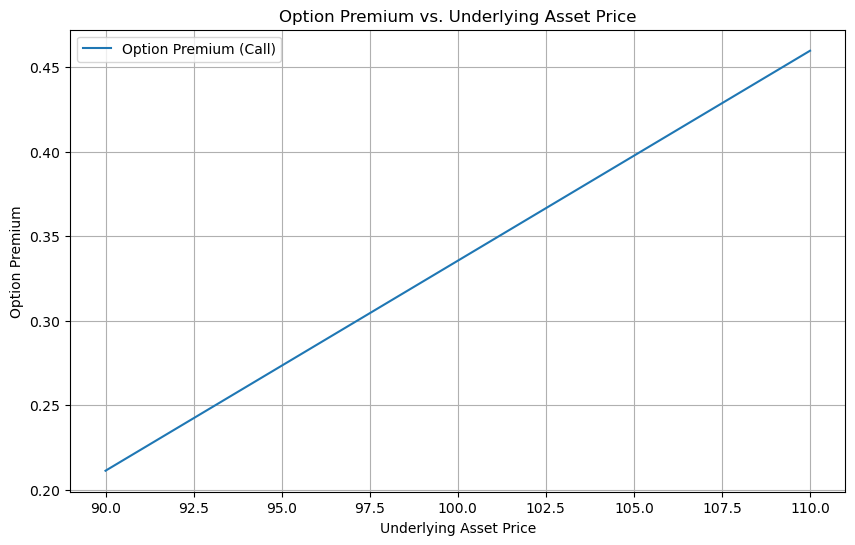

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data for the option premium based on various factors
underlying_price = np.linspace(90, 110, 50)
strike_price = 73
volatility = 0.2
time_to_expiry = 0.25
risk_free_rate = 0.05

call_option_premium = np.maximum(underlying_price - strike_price, 0) - np.exp(-risk_free_rate * time_to_expiry) * np.maximum(underlying_price - strike_price, 0)

plt.figure(figsize=(10, 6))
plt.plot(underlying_price, call_option_premium, label='Option Premium (Call)')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Option Premium')
plt.title('Option Premium vs. Underlying Asset Price')
plt.legend()
plt.grid(True)
plt.show()
